In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import PolynomialFeatures

In [297]:
# Task 1) Loading the Data and performing Preprocessing
data = pd.read_csv('heart_disease_dataset.csv')

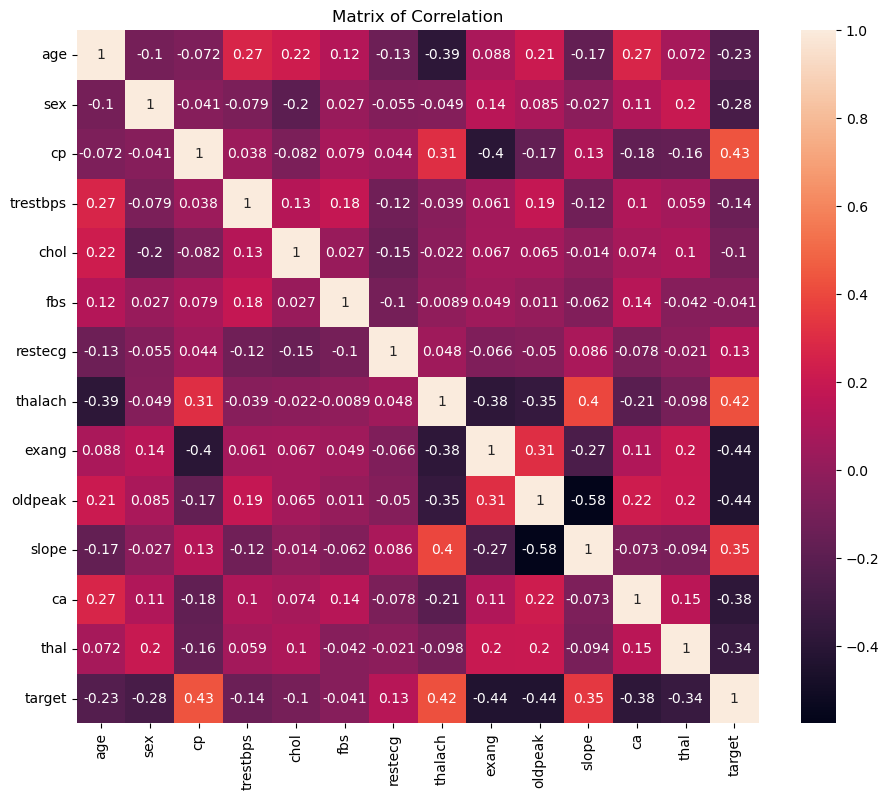

In [299]:
# Calculate and visualize the correlation matrix for all feature pairs
correlation_matrix = data.corr()
plt.figure(figsize=(11, 9))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Matrix of Correlation")
plt.show()


In [300]:
# correlation between each feature and the target variable 
correlations = correlation_matrix['target'].abs().sort_values(ascending=False)
print(correlations)

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


In [301]:
# Identify the four most informative features that have the strongest correlation with the target.

print("4 Most Informative Features:\n", correlations[1:5])

4 Most Informative Features:
 oldpeak    0.438441
exang      0.438029
cp         0.434854
thalach    0.422895
Name: target, dtype: float64


In [302]:
# checking for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [306]:
# Performing encoding wherever you seem it fit inorder to make the categorical data compatible for training
# https://www.geeksforgeeks.org/encoding-categorical-data-in-sklearn/
# https://www.geeksforgeeks.org/ml-one-hot-encoding/
# https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# https://stackoverflow.com/questions/63661560/drop-first-true-during-dummy-variable-creation-in-pandas
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

# onehot_encoder = OneHotEncoder(sparse_output=False)
# data = onehot_encoder.fit_transform(data)

data = pd.get_dummies(data, drop_first=True)
print(data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [308]:
# Set the seed value as 42 and perform the train-test-validation split on the data using the ratio as 60:20:20
# https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/
# 60% training subset and 40% temporary subset to use to create validation and test subsets
X_training, X_temp, y_training, y_temp = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # 50/50 split of remaining 40% data


In [339]:
# Task 2) Perform Linear Regression to predict the cholesterol levels of the patient
# https://www.geeksforgeeks.org/linear-regression-python-implementation/
linr = LinearRegression()
linr.fit(X_training, y_training)

y_pred_validation = linr.predict(X_validation)

# Use the necessary performance metrics to analyze the performance of your model
mse = mean_squared_error(y_validation, y_pred_validation)
rSqrd = r2_score(y_validation, y_pred_validation)
print("MSE: " + str(mse) + "\n")
print("R-Squared: " + str(rSqrd))

MSE: 0.11611880701095566

R-Squared: 0.5349825743629302


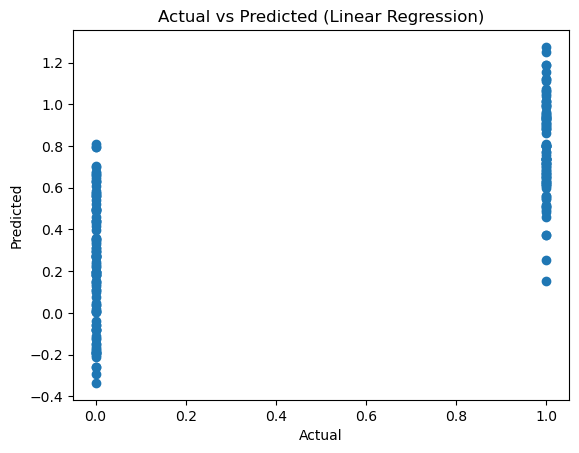

In [387]:
# Visualize the actual values against the real values using a scatter plot
plt.scatter(y_validation, y_pred_validation)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

In [389]:
# Try to apply the concepts of normalization
scaler = StandardScaler()
X_training_norm = scaler.fit_transform(X_training)
X_validation_norm = scaler.transform(X_validation)
X_test_norm = scaler.transform(X_test)

linr_norm = LinearRegression()
linr_norm.fit(X_training_norm, y_training)

y_pred_validation_norm = linr_norm.predict(X_validation_norm)

mse = mean_squared_error(y_validation, y_pred_validation_norm)
rSqrd = r2_score(y_validation, y_pred_validation_norm)
print("MSE: " + str(mse) + "\n")
print("R-Squared: " + str(rSqrd))

MSE: 0.11611880701095602

R-Squared: 0.5349825743629286


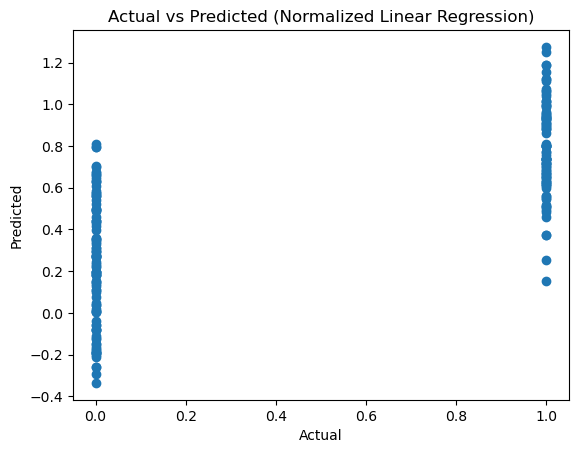

In [391]:
plt.scatter(y_validation, y_pred_validation_norm)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Normalized Linear Regression)")
plt.show()

In [393]:
# Task 3) Perform Logistic Regression {MEANT TO BE POLYNOMIAL REGRESSION IM ASSUMING} 
# to predict whether the patient has a chance to get a heart disease or not
# https://www.geeksforgeeks.org/ml-logistic-regression-using-python/

# Set the polynomial degree as 2
poly_reg = PolynomialFeatures(degree=2)
X_training_poly_reg = poly_reg.fit_transform(X_training_norm)
X_validation_poly_reg = poly_reg.transform(X_validation_norm)

log_reg_poly = LogisticRegression(max_iter=200)
log_reg_poly.fit(X_training_poly_reg, y_training)

y_pred_poly = log_reg_poly.predict(X_validation_poly_reg)


# https://medium.com/javarevisited/evaluating-the-logistic-regression-ae2decf42d61
# analyze the performance.
conf_matrix_poly = confusion_matrix(y_validation, y_pred_poly)
print(conf_matrix_poly)
print("Accuracy: ")
print(accuracy_score(y_validation, y_pred_poly))


[[100   6]
 [  3  96]]
Accuracy: 
0.9560975609756097


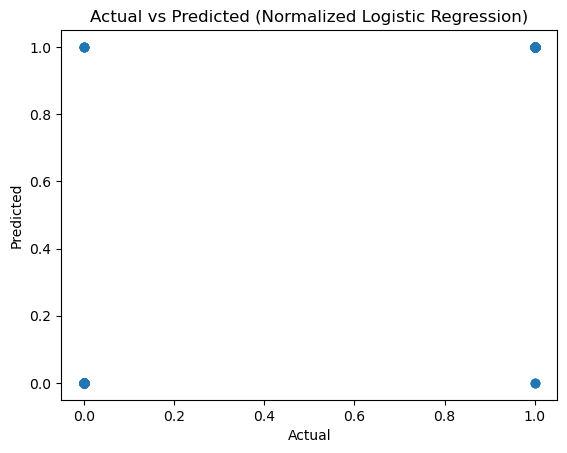

In [371]:
# Visualize the actual values against the real values using a scatter plot.
# this looks wrong - looks wrong because categorical values on scatter plot doesnt map well
plt.scatter(y_validation, y_pred_poly)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Normalized Logistic Regression)")
plt.show()

In [373]:
# Task 4) Perform Polynomial Regression {MEANT TO BE LOGISTIC REGRESSION IM ASSUMING}
# to predict if the patient has a chance to get a heart disease or not

# For the number of iterations for logistic regression, set the max_iter to 200 and analyze the performance.
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_training_poly, y_training)

y_pred_log = log_reg.predict(X_validation_poly)

# analyze the performance.
conf_matrix_log = confusion_matrix(y_validation, y_pred_log)
print(conf_matrix_log)
print("Accuracy: ")
print(accuracy_score(y_validation, y_pred_log))

[[100   6]
 [  3  96]]
Accuracy: 
0.9560975609756097


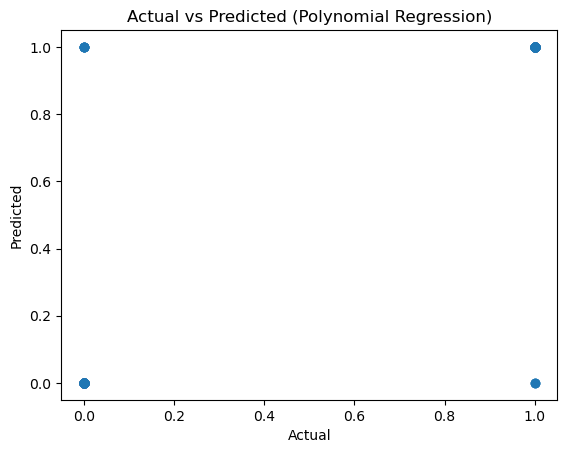

In [375]:
plt.scatter(y_validation, y_pred_poly)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Polynomial Regression)")
plt.show()

In [377]:
# Part 2: Neural Networks

# Task 1) Loading, Preprocessing and Visualizing the Data

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# A. Check for NaN values
print(np.isnan(x_train).sum())
print(np.isnan(x_test).sum())

0
0


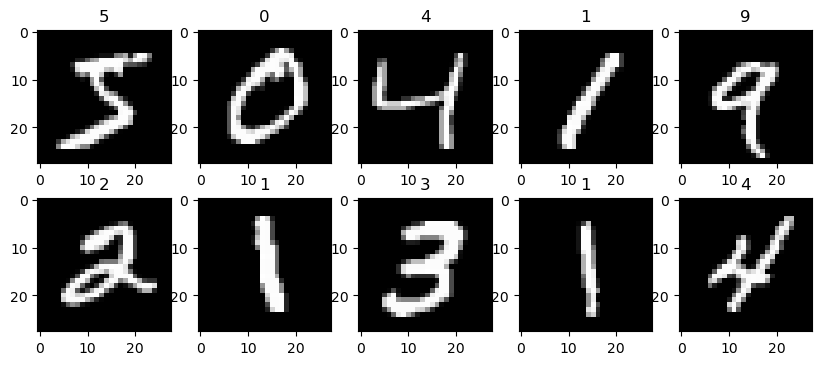

In [379]:
#we achieve this by dividing each value by 255.0.
x_train = x_train / 255.0
x_test = x_test / 255.0

# we need to specify the input shape so the model understands the format of the input data
# # https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# To integrate categorical labels into our model, we need to convert them into one-hot encodings.
# https://www.geeksforgeeks.org/python-keras-keras-utils-to_categorical/
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Visualize 10 random numbers in the dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(np.argmax(y_train[i]))
plt.show()

In [381]:
# Task 2) Construction of the Neural Network

# https://medium.com/@vikeshsingh37/your-first-image-classification-convolutional-neural-network-model-using-keras-c99bf3bcb439

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D,Dropout,Dense, Flatten
from keras import optimizers

# Construct a sequential neural network with convolutional layers, max pooling layers, dropout layers and dense layers.
model = Sequential()
model.add(Conv2D(filters=32, kernel_size= (3,3), strides=1, padding='Same',activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=16, kernel_size= (3,3), strides=1, padding='Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
print(model.summary())


# print("x_train shape:", x_train.shape)  # should be (num_samples, 28, 28, 1)
# print("y_train shape:", y_train.shape)  # should be (num_samples, 10)
# print("x_test shape:", x_test.shape)
# print("y_test shape:", y_test.shape)

# y_train and y_test were (num_samples, 10, 10, 10, 10) - ran everything without changing anything and it returned to (num_samples, 10) - ?

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_58 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_52 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 dropout_59 (Dropout)        (None, 7, 7, 16)        

In [385]:
# Task 3: Training the Neural Network and Visualizing the results
# https://stackoverflow.com/questions/37973005/what-do-model-predict-and-model-fit-do

optimizer = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

modell = model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=128)

Epoch 1/20
422/422 [==============================] - 17s 39ms/step - loss: 0.0973 - accuracy: 0.9704 - val_loss: 0.0415 - val_accuracy: 0.9878
Epoch 2/20
422/422 [==============================] - 16s 38ms/step - loss: 0.0785 - accuracy: 0.9758 - val_loss: 0.0362 - val_accuracy: 0.9893
Epoch 3/20
422/422 [==============================] - 16s 39ms/step - loss: 0.0711 - accuracy: 0.9782 - val_loss: 0.0363 - val_accuracy: 0.9892
Epoch 4/20
422/422 [==============================] - 17s 41ms/step - loss: 0.0664 - accuracy: 0.9804 - val_loss: 0.0358 - val_accuracy: 0.9892
Epoch 5/20
422/422 [==============================] - 16s 39ms/step - loss: 0.0645 - accuracy: 0.9805 - val_loss: 0.0331 - val_accuracy: 0.9905
Epoch 6/20
422/422 [==============================] - 16s 38ms/step - loss: 0.0615 - accuracy: 0.9815 - val_loss: 0.0316 - val_accuracy: 0.9912
Epoch 7/20
422/422 [==============================] - 16s 38ms/step - loss: 0.0590 - accuracy: 0.9826 - val_loss: 0.0320 - val_accuracy:

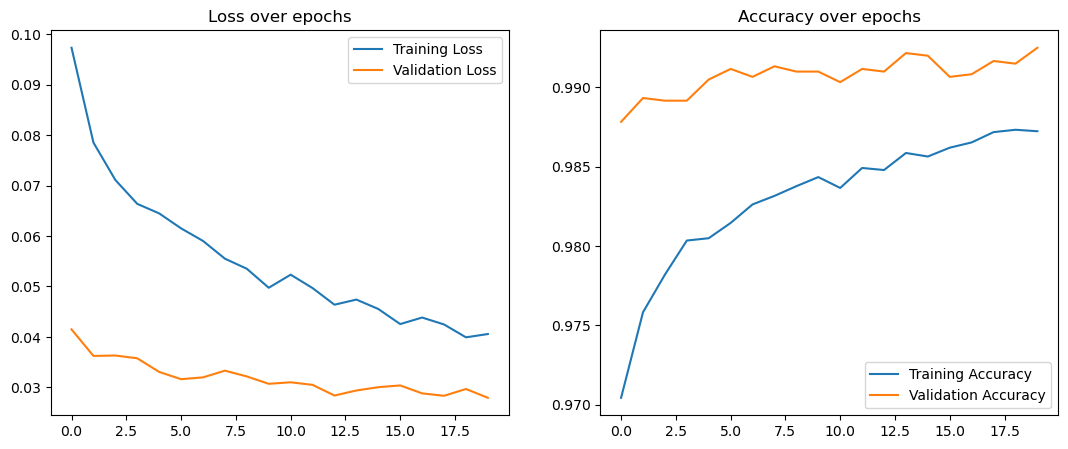

In [399]:
# Visualize the training and validation loss and accuracy over epochs using Matplotlib.
# Arrange the visualizations in a single figure with multiple subplots
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

plt.figure(figsize=(13, 5))

# LOSS
plt.subplot(1, 2, 1)
plt.title('Loss over epochs')
plt.plot(modell.history['loss'], label='Training Loss')
plt.plot(modell.history['val_loss'], label='Validation Loss')
plt.legend()

# ACC
plt.subplot(1, 2, 2)
plt.title('Accuracy over epochs')
plt.plot(modell.history['accuracy'], label='Training Accuracy')
plt.plot(modell.history['val_accuracy'], label='Validation Accuracy')
plt.legend()


plt.show()

313/313 [==============================] - 2s 5ms/step


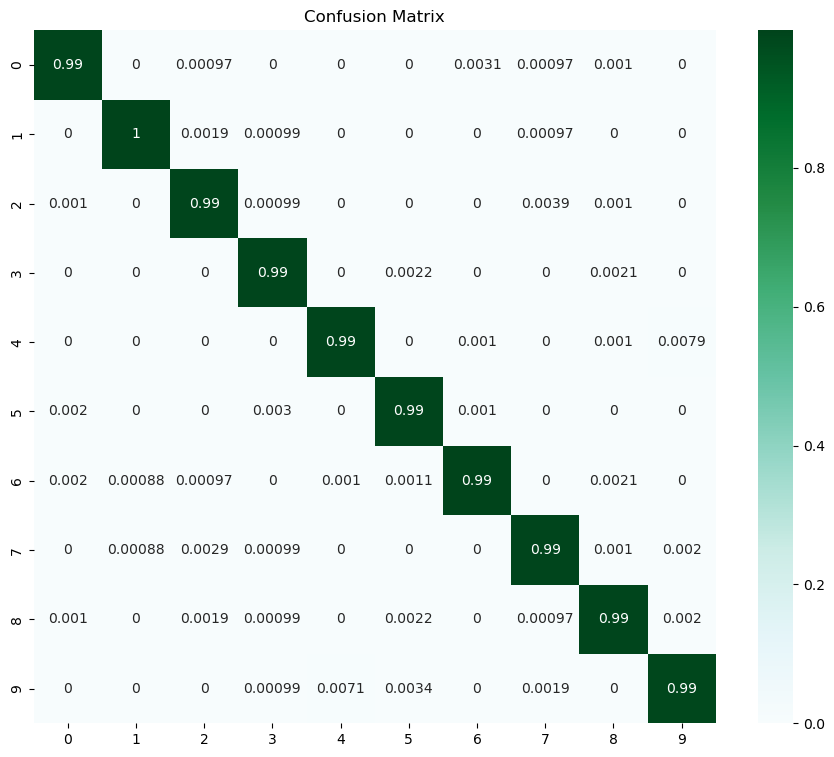

In [401]:
# https://medium.com/javarevisited/evaluating-the-logistic-regression-ae2decf42d61
y_prediction = model.predict(x_test)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(y_test, axis=1)

result = confusion_matrix(y_test, y_prediction , normalize='pred')

plt.figure(figsize=(11, 9))
sns.heatmap(result, annot=True, cmap="BuGn")
plt.title("Confusion Matrix")
plt.show()
